## loading the required packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from ast import literal_eval
from plotly.subplots import make_subplots

## data loading & cleaning

In [2]:
df = pd.read_csv('data/listings.csv')
df2 = pd.read_csv('data/listings-detailed.csv')

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23911 non-null  int64  
 1   name                            23908 non-null  object 
 2   host_id                         23911 non-null  int64  
 3   host_name                       23906 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23911 non-null  object 
 6   latitude                        23911 non-null  float64
 7   longitude                       23911 non-null  float64
 8   room_type                       23911 non-null  object 
 9   price                           23911 non-null  int64  
 10  minimum_nights                  23911 non-null  int64  
 11  number_of_reviews               23911 non-null  int64  
 12  last_review                     

In [4]:

df2=df2.drop(["host_verifications","host_has_profile_pic","host_identity_verified","scrape_id","scrape_id","host_name","host_thumbnail_url","host_picture_url","picture_url","neighbourhood_group_cleansed","bathrooms","calendar_updated"],axis=1)
df2["price"]=df2["price"].apply(lambda x : float(x[1:].replace(",","")))
df2.drop(df2[df2["price"]>=50000].index,axis=0,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23908 non-null  int64  
 1   listing_url                                   23908 non-null  object 
 2   last_scraped                                  23908 non-null  object 
 3   name                                          23905 non-null  object 
 4   description                                   23431 non-null  object 
 5   neighborhood_overview                         15118 non-null  object 
 6   host_id                                       23908 non-null  int64  
 7   host_url                                      23908 non-null  object 
 8   host_since                                    23903 non-null  object 
 9   host_location                                 23868 non-null 

In [5]:
df2["amenities"] = df2["amenities"].apply(literal_eval)

In [6]:
exploded_df2 = df2.explode('amenities')

In [105]:
df_new = pd.crosstab(exploded_df2['id'],exploded_df2['amenities']).rename_axis(None,axis=1)
df_new

,- condiviso con gli ospiti delle altre stanze. refrigerator,Bosch induction stove,vari marchi di shampoo di buona qualità shampoo,- body soap,- refrigerator,- shampoo,- stove,. body soap,. conditioner,. oven,...,Yves Rocher conditioner,Zagara body soap,Zagara shampoo,Zanussi stove,Zara Home body soap,Zerowatt oven,Zoppas induction stove,Zoppas Clima4 refrigerator,Zoppas refrigerator,。 body soap
id,,,,,,,,,,,,,,,,,,,,,
2737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643887148301452676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643892318015714276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643958447866594121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dict_df = {}
for c in df_new.columns:
	dict_df[c] = df_new[c].value_counts()[1]

In [9]:
sorted_keys = sorted(dict_df, reverse=True, key=dict_df.get)
sorted_dict = {}
for w in sorted_keys:
    sorted_dict[w] = dict_df[w]
sorted_dict

{'amenities_Wifi': 22068,
 'amenities_Essentials': 21537,
 'amenities_Hair dryer': 21417,
 'amenities_Long term stays allowed': 21157,
 'amenities_Heating': 20147,
 'amenities_Hangers': 19166,
 'amenities_Kitchen': 18460,
 'amenities_Air conditioning': 17447,
 'amenities_Hot water': 17161,
 'amenities_Iron': 17145,
 'amenities_Shampoo': 16492,
 'amenities_TV': 15741,
 'amenities_Refrigerator': 14960,
 'amenities_Dishes and silverware': 14669,
 'amenities_Cooking basics': 13647,
 'amenities_Coffee maker': 13590,
 'amenities_First aid kit': 13261,
 'amenities_Bed linens': 13011,
 'amenities_Fire extinguisher': 12278,
 'amenities_Washer': 11351,
 'amenities_Elevator': 10906,
 'amenities_Stove': 9300,
 'amenities_Microwave': 9274,
 'amenities_Extra pillows and blankets': 9006,
 'amenities_Host greets you': 8442,
 'amenities_Oven': 8270,
 'amenities_Free street parking': 7815,
 'amenities_Smoke alarm': 7213,
 'amenities_Luggage dropoff allowed': 6627,
 'amenities_Carbon monoxide alarm': 625

In [10]:
# df_new = df_new[['amenities_Wifi', 'amenities_Hair dryer', 'amenities_Long term stays allowed',
# 'amenities_Heating', 'amenities_Breakfast', 'amenities_Air conditioning', 'amenities_Hot water', 'amenities_Iron', 'amenities_TV', 'amenities_Coffee maker', 'amenities_Dedicated workspace', 'amenities_Private entrance']]
# df_new

,amenities_Wifi,amenities_Hair dryer,amenities_Long term stays allowed,amenities_Heating,amenities_Breakfast,amenities_Air conditioning,amenities_Hot water,amenities_Iron,amenities_TV,amenities_Coffee maker,amenities_Dedicated workspace,amenities_Private entrance
id,,,,,,,,,,,,
2737,1,1,1,1,0,0,0,1,0,0,0,0
11834,1,1,1,1,0,1,1,1,0,1,0,0
12398,1,1,1,1,0,0,1,1,0,1,1,0
19965,1,1,1,1,0,1,1,1,1,1,1,0
19967,1,1,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
643887148301452676,1,0,1,1,0,1,1,1,1,0,0,0
643892318015714276,1,0,1,0,0,1,1,1,1,0,0,0
643958447866594121,1,0,1,0,0,1,1,1,1,0,0,0


In [12]:
df = pd.concat([df.set_index("id"), df_new], axis=1, join='inner').reset_index()
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,amenities_Yves Rocher conditioner,amenities_Zagara body soap,amenities_Zagara shampoo,amenities_Zanussi stove,amenities_Zara Home body soap,amenities_Zerowatt oven,amenities_Zoppas induction stove,amenities_Zoppas Clima4 refrigerator,amenities_Zoppas refrigerator,amenities_。 body soap
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,...,0,0,0,0,0,0,0,0,0,0
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,...,0,0,0,0,0,0,0,0,0,0
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,...,0,0,0,0,0,0,0,0,0,0
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,...,0,0,0,0,0,0,0,0,0,0
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,46885223,B/B appartamento in Resort privato aeroporto F...,49598986,Matteo,NaN,X Ostia/Acilia,41.75600,12.27426,Private room,133,...,0,0,0,0,0,0,0,0,0,0
23899,50476041,Camera familiare con bagno privato,180434699,Isola Verde,NaN,X Ostia/Acilia,41.75379,12.27481,Private room,111,...,0,0,0,0,0,0,0,0,0,0
23900,15036138,Lovely Studio in Fiumicino,40777678,Davide,NaN,X Ostia/Acilia,41.76378,12.26707,Entire home/apt,50,...,0,0,0,0,0,0,0,0,0,0
23901,28794787,ENEA HOUSE 8,185524529,Enea,NaN,X Ostia/Acilia,41.76234,12.26589,Private room,63,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23903 entries, 0 to 23902
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  23903 non-null  int64  
 1   name                                23900 non-null  object 
 2   host_id                             23903 non-null  int64  
 3   host_name                           23898 non-null  object 
 4   neighbourhood_group                 0 non-null      float64
 5   neighbourhood                       23903 non-null  object 
 6   latitude                            23903 non-null  float64
 7   longitude                           23903 non-null  float64
 8   room_type                           23903 non-null  object 
 9   price                               23903 non-null  int64  
 10  minimum_nights                      23903 non-null  int64  
 11  number_of_reviews                   23903

## EDA

In [25]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

id                                          0
name                                        3
host_id                                     0
host_name                                   5
neighbourhood_group                     23903
                                        ...  
amenities_Zerowatt oven                     0
amenities_Zoppas  induction stove           0
amenities_Zoppas Clima4 refrigerator        0
amenities_Zoppas refrigerator               0
amenities_。 body soap                       0
Length: 2229, dtype: int64

In [27]:
Long=12
Lat=42
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

<AxesSubplot:>

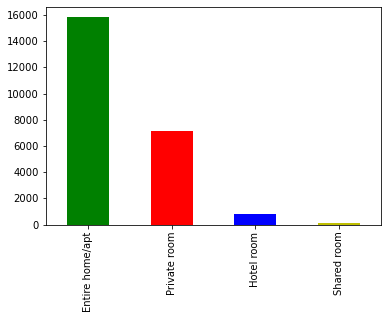

In [28]:
df['room_type'].value_counts().plot(kind = 'bar', color = ['g', 'r', 'b', 'y'])

In [29]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,apartment
3263,23532561,IFlat,I Centro Storico,154
6173,96122546,CleanBnB Team,I Centro Storico,82
5434,63191555,Halldis,I Centro Storico,51
623,2405376,Lorenzo,I Centro Storico,51
8208,224869116,Sonder (Rome),I Centro Storico,48
90,316068,Federico,I Centro Storico,38
291,1107433,WonderWhereToStay,I Centro Storico,36
2954,20428282,Nicoletta,I Centro Storico,36
356,1369759,Angelo,I Centro Storico,33
2328,13766340,Andreas,I Centro Storico,33


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'VII San Giovanni/Cinecittà'),
  Text(2, 0, 'II Parioli/Nomentano'),
  Text(3, 0, 'XIII Aurelia'),
  Text(4, 0, 'XII Monte Verde')])

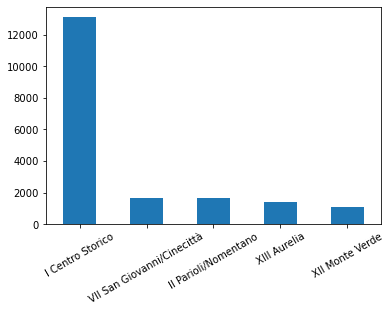

In [30]:
dist_plt = df['neighbourhood'].value_counts().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'XIII Aurelia'),
  Text(2, 0, 'XV Cassia/Flaminia'),
  Text(3, 0, 'II Parioli/Nomentano'),
  Text(4, 0, 'XII Monte Verde')])

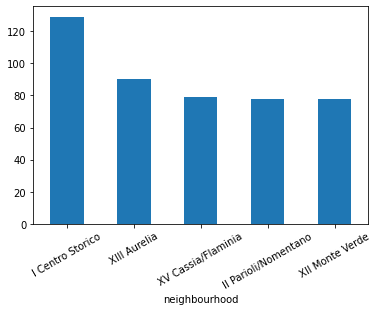

In [31]:
mode_dist_plt = df.groupby('neighbourhood')['price'].median().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'II Parioli/Nomentano'),
  Text(2, 0, 'XIII Aurelia'),
  Text(3, 0, 'XV Cassia/Flaminia'),
  Text(4, 0, 'IX Eur')])

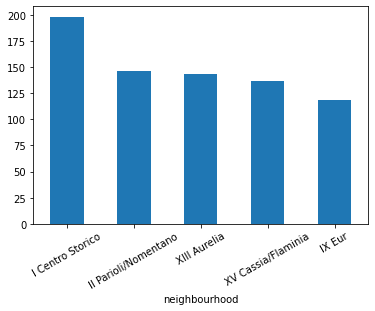

In [32]:
mean_dist_plt = df.groupby('neighbourhood')['price'].mean().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

In [33]:
df['price'].describe()

count    23903.000000
mean       158.705685
std        404.712277
min          0.000000
25%         65.000000
50%        100.000000
75%        157.000000
max      25553.000000
Name: price, dtype: float64

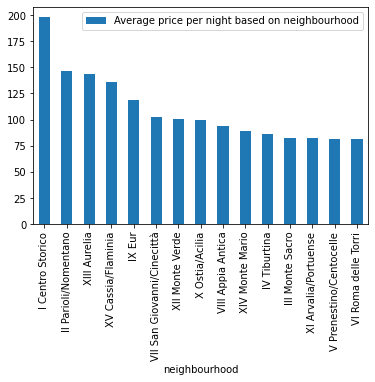

,Average price per night based on neighbourhood
neighbourhood,
I Centro Storico,198.182068
II Parioli/Nomentano,146.295732
XIII Aurelia,143.172439
XV Cassia/Flaminia,136.271222
IX Eur,118.437870
VII San Giovanni/Cinecittà,102.632836
XII Monte Verde,100.791139
X Ostia/Acilia,99.659446
VIII Appia Antica,93.883178


In [34]:
df_mean_dist = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
        ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df_mean_dist.plot(kind='bar')
plt.show()
pd.DataFrame(df_mean_dist)

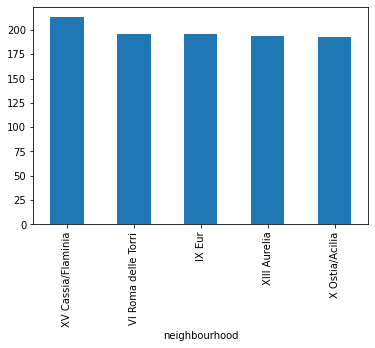

In [35]:
df5 = df.groupby('neighbourhood')['availability_365'].mean().nlargest(5).plot.bar()

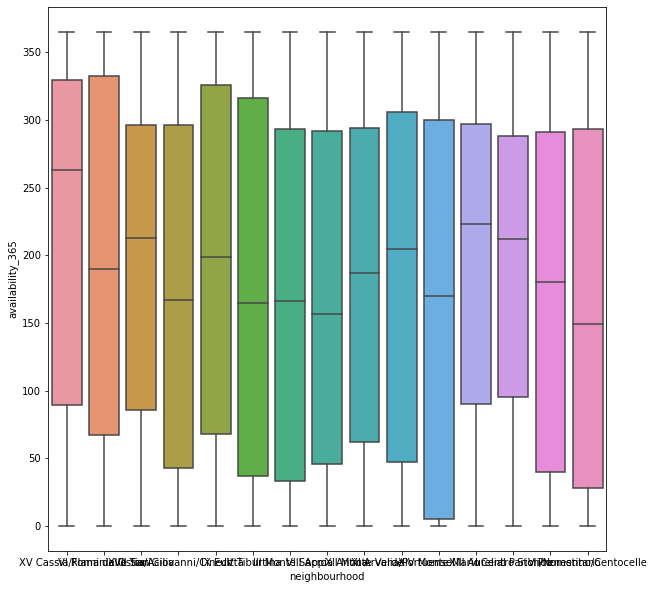

In [36]:


plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood',y='availability_365')

In [75]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df[c].value_counts()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Most Frequent Amenities", labels={
	"y": "Count",
	"x": "Amenities"
})
fig.show()


In [76]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['price'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Average Price for the Most Frequent Amenities", labels={
	"y": "Average Price",
	"x": "Amenities"
})
fig.show()


In [104]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[10:35]
amenities = {c:df.groupby(c)['price'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Average Price for the Most Frequent Amenities", labels={
	"y": "Average Price",
	"x": "Amenities"
}, height=900, width=1000)
fig.show()

In [67]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df.groupby(c)['price'].mean()[1]

amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['price'].mean()[1] for c in amenities_list}
amenities_count = {c:df[c].value_counts()[1] for c in amenities_list}

fig = make_subplots(
    rows=1, cols=2,
)

fig.add_trace(
	go.Bar(x = list(amenities.keys()), y = list(amenities.values())), row=1, col=1
)
fig.add_trace(
	go.Bar(x = list(amenities_count.keys()), y = list(amenities_count.values())), row=1, col=2
)
fig.update_layout(title_text="Highest Price Amenities and Their Count")
fig.show()

In [106]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df[c].value_counts()[1]
amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['number_of_reviews_ltm'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Total Number of Reviews for The Most Frequent Amenities", labels={
	"y": "Number of Reviews",
	"x": "Amenities"
})
fig.show()

In [107]:
amenities = {}
for c in df.columns:
	if "amenities" in c: 
		amenities[c] = df.groupby(c)['price'].mean()[1]

amenities_list = sorted(amenities, key=amenities.get, reverse=True)[:10]
amenities = {c:df.groupby(c)['number_of_reviews_ltm'].mean()[1] for c in amenities_list}
fig = px.bar(x = amenities.keys(), y = amenities.values(), title = "Total Number of Reviews for The Most Expensive Amenities", labels={
	"y": "Number of Reviews",
	"x": "Amenities"
})
fig.show()

# -----------------------------------------------------

### what is the income of the past year and the expected income for the next 3 months?

- add min_booked_nights_past_12m and min_income_past_12m column to the dataset

In [39]:
romeListings = df2.copy()
#the minimum estmtation of the number of booked nights of each listing in the last 12 month (current date = 2022-06-07)
romeListings["min_booked_nights_past_12m"]=romeListings.apply(lambda x : x["number_of_reviews_ltm"]*x["minimum_nights_avg_ntm"],axis=1)

#the minimum estmtation of the income of each listing in the last 12 month (current date = 2022-06-07)
romeListings["min_income_past_12m"]=romeListings.apply(lambda x : x["min_booked_nights_past_12m"]*x["price"],axis=1)


- add expected_booked_nights_coming_3m and expected_income_coming_3m column to the dataset

In [40]:
#the expected number of booked nights of each listing in the next 3 month (current date = 2022-06-07)
romeListings["expected_booked_nights_coming_3m"]=romeListings.apply(lambda x : 90-x["availability_90"],axis=1)

#the expected income of each listing  in the next 3 month (current date = 2022-06-07)
romeListings["expected_income_coming_3m"]=romeListings.apply(lambda x : (90-x["availability_90"])*x["price"],axis=1)

#### the neighbourhoods with the highest minumam income average for the past 12 months


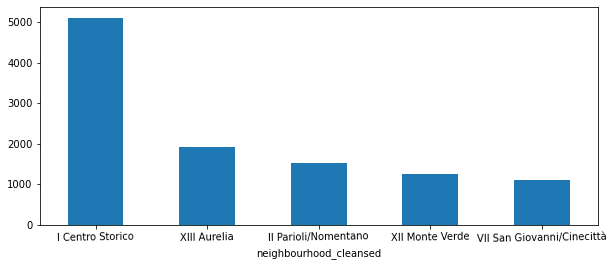

In [41]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("neighbourhood_cleansed")["min_income_past_12m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);


### the neighbourhoods with the highest expected income average for the next 3 months

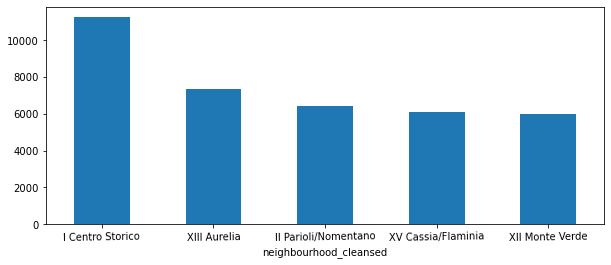

In [42]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("neighbourhood_cleansed")["expected_income_coming_3m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);



#### the room type with the highest minumam income average for the past 12 months


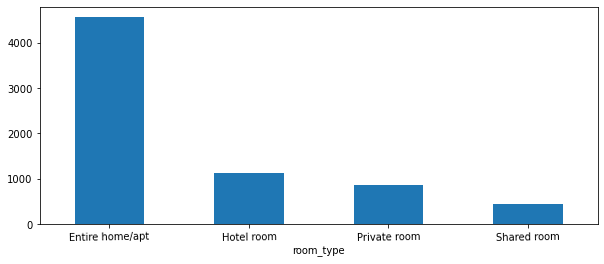

In [43]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("room_type")["min_income_past_12m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);


#### the room type with the highest expected income average for the next 3 months

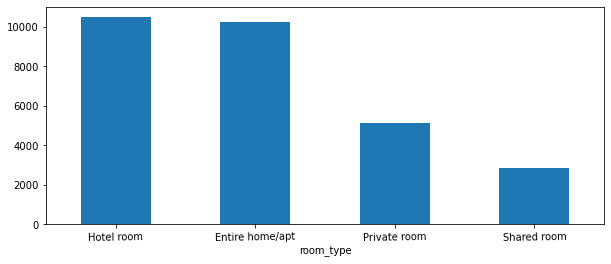

In [44]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("room_type")["expected_income_coming_3m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);


#### how many listings per host?

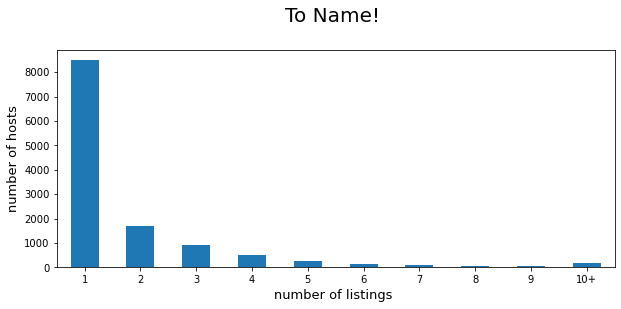

In [45]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
nListingsPerHostCount=df.groupby("host_id")["calculated_host_listings_count"].mean().value_counts()
nListingsPerHostCount[10]= nListingsPerHostCount[10:].sum()
nListingsPerHostCount.drop(nListingsPerHostCount.index[10:],inplace=True)
nListingsPerHostCount=nListingsPerHostCount.reset_index()
nListingsPerHostCount["index"]=["1","2","3","4","5","6","7","8","9","10+"]
nListingsPerHostCount.set_index(nListingsPerHostCount["index"],inplace=True)
nListingsPerHostCount["calculated_host_listings_count"].plot(kind='bar', rot=1)
ax.set_title('To Name! \n', fontsize=20)
ax.set_xlabel("number of listings ",fontsize=13)
ax.set_ylabel("number of hosts",fontsize=13);